## 1. Where the most sales happened? and Predict the delivery-grade by location:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
m_table = pd.read_csv("Data/location_modified.csv", index_col=0)
m_table.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   zipcode          customer_city                          order_id  \
0    14409                 franca  00e7ee1b050b8499577073aeb2a297a1   
1     9790  sao bernardo do campo  29150127e6685892b6eab3eec79f59c7   
2     1151              sao paulo  b2059ed67ce144a36e2aa97d2c9e9ad2   
3     8775        mogi das cruzes  951670f92359f4fe4a63112aa7306eba   
4    13056               campinas  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_status            timestamp       delivered_date       estimated_date  \
0    delivered  2017-05-16 15:05:35  2017-05-25 10:35:35  2017-06-05 00:00:00   
1    delivered  2018-01-12 20:48:24  2018-01-29 12:41:19  2018-02-06 00:00:00   
2    delivered  2018-05-19 16:07:45  2018-06-14 17:58:51  2018-06-13 00:00:00   
3    delivered  2018-03-13 16:06:38  2018-03-28 16:04:25  2018-04-10 00:00:00   
4    delivered  2018-07-29 09:51:30  2018-08-09 20:55:48  2018-08-15 00:00:00   

    latitude  longitude  order_item_id                        product_id  \
0 -20.509897 -47.397866              1  a9516a079e37a9c9c36b9b78b10169e8   
1 -23.726853 -46.545746              1  4aa6014eceb682077f9dc4bffebc05b0   
2 -23.527788 -46.660310              1  bd07b66896d6f1494f5b86251848ced7   
3 -23.496930 -46.185352              1  a5647c44af977b148e0a3a4751a09e2e   
4 -22.987222 -47.151073              1  9391a573abe00141c56e38d84d7d5b3b   

                          seller_id   price  freight_value  total_value  
0  7c67e1448b00f6e969d365cea6b010ab  124.99          21.88       146.87  
1  b8bc237ba3788b23da09c0f1f3a3288c  289.00          46.48       335.48  
2  7c67e1448b00f6e969d365cea6b010ab  139.94          17.79       157.73  
3  7c67e1448b00f6e969d365cea6b010ab  149.94          23.36       173.30  
4  4a3ca9315b744ce9f8e9374361493884  230.00          22.25       252.25

In [3]:
m_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96194 entries, 0 to 109889
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         96194 non-null  object 
 1   customer_unique_id  96194 non-null  object 
 2   zipcode             96194 non-null  int64  
 3   customer_city       96194 non-null  object 
 4   order_id            96194 non-null  object 
 5   order_status        96194 non-null  object 
 6   timestamp           96194 non-null  object 
 7   delivered_date      96194 non-null  object 
 8   estimated_date      96194 non-null  object 
 9   latitude            96194 non-null  float64
 10  longitude           96194 non-null  float64
 11  order_item_id       96194 non-null  int64  
 12  product_id          96194 non-null  object 
 13  seller_id           96194 non-null  object 
 14  price               96194 non-null  float64
 15  freight_value       96194 non-null  float64
 16  tot

### Mapping the orders by location

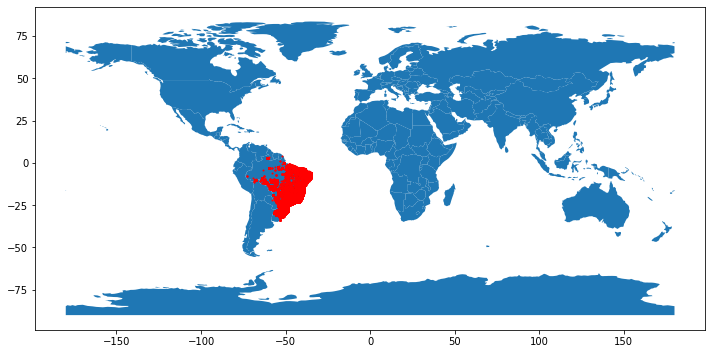

In [4]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(m_table['longitude'], m_table['latitude'])]
gdf = GeoDataFrame(m_table, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(12,10)), marker='o', color='red', markersize=1)

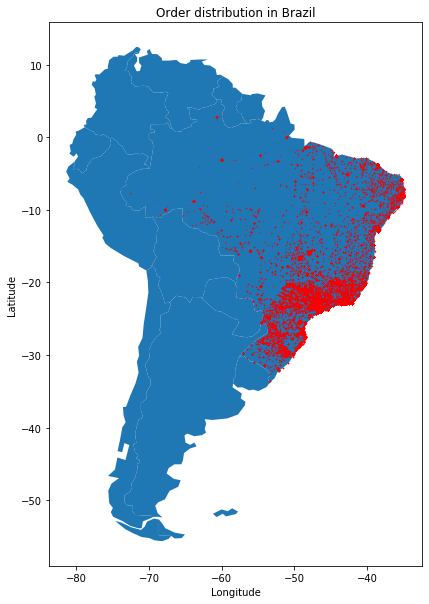

In [5]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(m_table['longitude'], m_table['latitude'])]
gdf = GeoDataFrame(m_table, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax1 = world[world.continent == 'South America'].plot(figsize=(12,10))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title("Order distribution in Brazil")
gdf.plot(ax=ax1,marker='o', color='red', markersize=0.05)
plt.show()

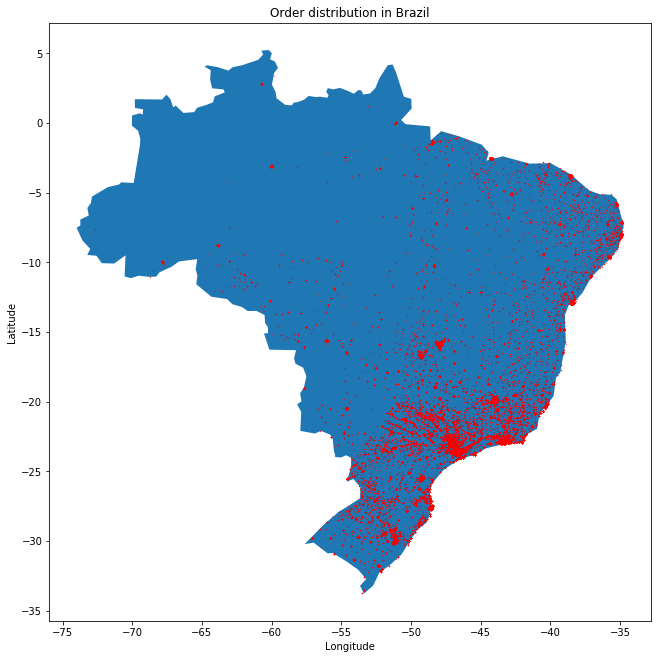

In [6]:
geometry = [Point(xy) for xy in zip(m_table['longitude'], m_table['latitude'])]
gdf = GeoDataFrame(m_table, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax1 = world[world.name == 'Brazil'].plot(figsize=(13,11))
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title("Order distribution in Brazil")
gdf.plot(ax=ax1,marker='o', color='red', markersize=0.05)
plt.show()

In [7]:
gdf = gpd.GeoDataFrame(m_table, geometry = gpd.points_from_xy(m_table.longitude, m_table.latitude))
gdf.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   zipcode          customer_city                          order_id  \
0    14409                 franca  00e7ee1b050b8499577073aeb2a297a1   
1     9790  sao bernardo do campo  29150127e6685892b6eab3eec79f59c7   
2     1151              sao paulo  b2059ed67ce144a36e2aa97d2c9e9ad2   
3     8775        mogi das cruzes  951670f92359f4fe4a63112aa7306eba   
4    13056               campinas  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_status            timestamp       delivered_date       estimated_date  \
0    delivered  2017-05-16 15:05:35  2017-05-25 10:35:35  2017-06-05 00:00:00   
1    delivered  2018-01-12 20:48:24  2018-01-29 12:41:19  2018-02-06 00:00:00   
2    delivered  2018-05-19 16:07:45  2018-06-14 17:58:51  2018-06-13 00:00:00   
3    delivered  2018-03-13 16:06:38  2018-03-28 16:04:25  2018-04-10 00:00:00   
4    delivered  2018-07-29 09:51:30  2018-08-09 20:55:48  2018-08-15 00:00:00   

    latitude  longitude  order_item_id                        product_id  \
0 -20.509897 -47.397866              1  a9516a079e37a9c9c36b9b78b10169e8   
1 -23.726853 -46.545746              1  4aa6014eceb682077f9dc4bffebc05b0   
2 -23.527788 -46.660310              1  bd07b66896d6f1494f5b86251848ced7   
3 -23.496930 -46.185352              1  a5647c44af977b148e0a3a4751a09e2e   
4 -22.987222 -47.151073              1  9391a573abe00141c56e38d84d7d5b3b   

                          seller_id   price  freight_value  total_value  \
0  7c67e1448b00f6e969d365cea6b010ab  124.99          21.88       146.87   
1  b8bc237ba3788b23da09c0f1f3a3288c  289.00          46.48       335.48   
2  7c67e1448b00f6e969d365cea6b010ab  139.94          17.79       157.73   
3  7c67e1448b00f6e969d365cea6b010ab  149.94          23.36       173.30   
4  4a3ca9315b744ce9f8e9374361493884  230.00          22.25       252.25   

                      geometry  
0  POINT (-47.39787 -20.50990)  
1  POINT (-46.54575 -23.72685)  
2  POINT (-46.66031 -23.52779)  
3  POINT (-46.18535 -23.49693)  
4  POINT (-47.15107 -22.98722)

<Figure size 864x864 with 0 Axes>

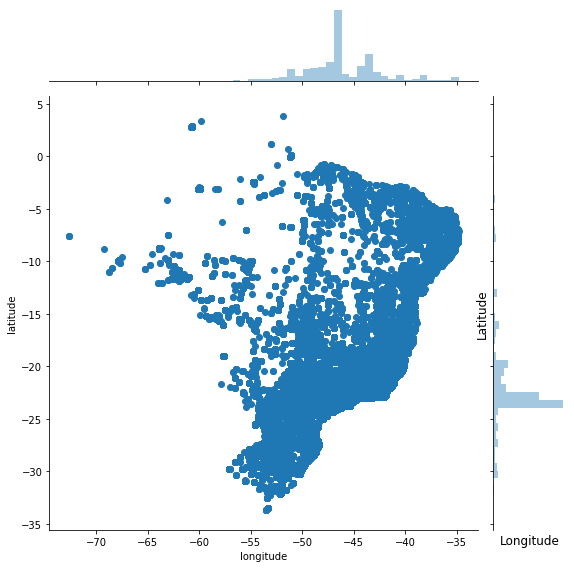

In [8]:
import seaborn as sns

x = m_table.loc[:,'longitude'].astype('float64')
y = m_table.loc[:,'latitude'].astype('float64')

color = sns.color_palette()
plt.figure(figsize=(12,12))
sns.jointplot(x,y,height=8)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [9]:
m_table.describe()

zipcode      latitude     longitude  order_item_id         price  \
count  96194.000000  96194.000000  96194.000000        96194.0  96194.000000   
mean   35110.803668    -21.205332    -46.189354            1.0    125.281048   
std    29819.019874      5.589596      4.049877            0.0    190.177872   
min     1003.000000    -33.691423    -72.666706            1.0      0.850000   
25%    11320.000000    -23.589216    -48.115558            1.0     41.300000   
50%    24360.000000    -22.926905    -46.632180            1.0     79.000000   
75%    58577.500000    -20.146615    -43.627351            1.0    139.900000   
max    99980.000000      3.844901    -34.800340            1.0   6735.000000   

       freight_value   total_value  
count   96194.000000  96194.000000  
mean       20.152627    145.433675  
std        15.803994    197.354729  
min         0.000000      6.080000  
25%        13.280000     57.290000  
50%        16.350000     95.830000  
75%        21.200000    162.630000  
max       409.680000   6929.310000

In [10]:
counts = m_table.customer_city.value_counts()
counts

sao paulo              15044
rio de janeiro          6604
belo horizonte          2697
brasilia                1908
curitiba                1489
                       ...  
pocoes de paineiras        1
jussiape                   1
angustura                  1
sao jose do xingu          1
passira                    1
Name: customer_city, Length: 4039, dtype: int64

### Top 10 City with the highest orders:

In [11]:
cities = pd.DataFrame(counts)
top10 = cities.head(10)
top10

customer_city
sao paulo                      15044
rio de janeiro                  6604
belo horizonte                  2697
brasilia                        1908
curitiba                        1489
campinas                        1406
porto alegre                    1341
salvador                        1185
guarulhos                       1143
sao bernardo do campo            911

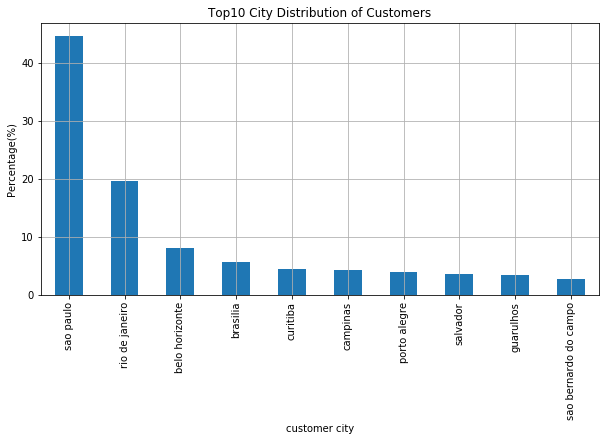

In [12]:
t = top10["customer_city"]/top10["customer_city"].sum()*100
plt.figure(figsize=(10,5))
plt.xlabel('customer city')
plt.ylabel('Percentage(%)')
plt.title("Top10 City Distribution of Customers")
t.plot(kind='bar', grid=True)

In [13]:
m_table.columns

Index(['customer_id', 'customer_unique_id', 'zipcode', 'customer_city',
       'order_id', 'order_status', 'timestamp', 'delivered_date',
       'estimated_date', 'latitude', 'longitude', 'order_item_id',
       'product_id', 'seller_id', 'price', 'freight_value', 'total_value',
       'geometry'],
      dtype='object')

In [14]:
m_table['timestamp'] = pd.to_datetime(m_table['timestamp'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce')
m_table['delivered_date'] = pd.to_datetime(m_table['delivered_date'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce')
m_table['estimated_date'] = pd.to_datetime(m_table['estimated_date'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce')

m_table[['timestamp','delivered_date']] = m_table[['timestamp','delivered_date']].apply(pd.to_datetime) 
m_table['delivery_days'] = abs((m_table['delivered_date'] - m_table['timestamp']).dt.days)
m_table['est_delivery_days'] = abs((m_table['estimated_date'] - m_table['timestamp']).dt.days)

In [15]:
m_table['order_day'] = m_table['timestamp'].dt.day
m_table['order_month'] = m_table['timestamp'].dt.month
m_table['order_year'] = m_table['timestamp'].dt.year

In [16]:
cols = ['timestamp','delivered_date', 'seller_id', 'product_id','estimated_date']
m_table.drop(cols, axis=1, inplace=True)
m_table.columns

Index(['customer_id', 'customer_unique_id', 'zipcode', 'customer_city',
       'order_id', 'order_status', 'latitude', 'longitude', 'order_item_id',
       'price', 'freight_value', 'total_value', 'geometry', 'delivery_days',
       'est_delivery_days', 'order_day', 'order_month', 'order_year'],
      dtype='object')

In [17]:
m_table.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   zipcode          customer_city                          order_id  \
0    14409                 franca  00e7ee1b050b8499577073aeb2a297a1   
1     9790  sao bernardo do campo  29150127e6685892b6eab3eec79f59c7   
2     1151              sao paulo  b2059ed67ce144a36e2aa97d2c9e9ad2   
3     8775        mogi das cruzes  951670f92359f4fe4a63112aa7306eba   
4    13056               campinas  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_status   latitude  longitude  order_item_id   price  freight_value  \
0    delivered -20.509897 -47.397866              1  124.99          21.88   
1    delivered -23.726853 -46.545746              1  289.00          46.48   
2    delivered -23.527788 -46.660310              1  139.94          17.79   
3    delivered -23.496930 -46.185352              1  149.94          23.36   
4    delivered -22.987222 -47.151073              1  230.00          22.25   

   total_value                     geometry  delivery_days  est_delivery_days  \
0       146.87  POINT (-47.39787 -20.50990)              8                 19   
1       335.48  POINT (-46.54575 -23.72685)             16                 24   
2       157.73  POINT (-46.66031 -23.52779)             26                 24   
3       173.30  POINT (-46.18535 -23.49693)             14                 27   
4       252.25  POINT (-47.15107 -22.98722)             11                 16   

   order_day  order_month  order_year  
0         16            5        2017  
1         12            1        2018  
2         19            5        2018  
3         13            3        2018  
4         29            7        2018

In [18]:
m_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96194 entries, 0 to 109889
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_id         96194 non-null  object  
 1   customer_unique_id  96194 non-null  object  
 2   zipcode             96194 non-null  int64   
 3   customer_city       96194 non-null  object  
 4   order_id            96194 non-null  object  
 5   order_status        96194 non-null  object  
 6   latitude            96194 non-null  float64 
 7   longitude           96194 non-null  float64 
 8   order_item_id       96194 non-null  int64   
 9   price               96194 non-null  float64 
 10  freight_value       96194 non-null  float64 
 11  total_value         96194 non-null  float64 
 12  geometry            96194 non-null  geometry
 13  delivery_days       96194 non-null  int64   
 14  est_delivery_days   96194 non-null  int64   
 15  order_day           96194 non-null 

### City with the highest orders in 2016:

In [19]:
count = m_table[(m_table.order_year==2016) & (m_table.customer_city.str.contains('sao paulo'))].count()
count.order_year

32

In [20]:
mask = m_table['order_year']==2016
city = pd.crosstab(m_table.loc[mask, "customer_city"] , m_table.loc[mask, "order_year"]).idxmax()
count = m_table[(m_table.order_year==2016) & (m_table.customer_city.str.contains('sao paulo'))].count()
pd.DataFrame({'city_name': city, 'count': count.order_year})

city_name  count
order_year                  
2016        sao paulo     32

In [21]:
mask = m_table['order_year']==2016
mon_2016 = pd.crosstab(m_table.loc[mask, "customer_city"] , m_table.loc[mask, "order_month"]).idxmax()
pd.DataFrame(mon_2016, columns=['city_name'])

city_name
order_month                      
9            sao joaquim da barra
10                      sao paulo
12                       curitiba

### City with the highest orders in 2017:

In [22]:
mask = m_table['order_year']==2017
city = pd.crosstab(m_table.loc[mask, "customer_city"] , m_table.loc[mask, "order_year"]).idxmax()
count = m_table[(m_table.order_year==2017) & (m_table.customer_city.str.contains('sao paulo'))].count()
pd.DataFrame({'city_name': city, 'count': count.order_year})

city_name  count
order_year                  
2017        sao paulo   6125

In [23]:
mask = m_table['order_year']==2017
mon_2017 = pd.crosstab(m_table.loc[mask, "customer_city"] , m_table.loc[mask, "order_month"]).idxmax()
pd.DataFrame(mon_2017, columns=['city_name'])

city_name
order_month           
1            sao paulo
2            sao paulo
3            sao paulo
4            sao paulo
5            sao paulo
6            sao paulo
7            sao paulo
8            sao paulo
9            sao paulo
10           sao paulo
11           sao paulo
12           sao paulo

### City with the highest orders in 2018:

In [24]:
mask = m_table['order_year']==2018
city = pd.crosstab(m_table.loc[mask, "customer_city"] , m_table.loc[mask, "order_year"]).idxmax()
count = m_table[(m_table.order_year==2018) & (m_table.customer_city.str.contains('sao paulo'))].count()
pd.DataFrame({'city_name': city, 'count': count.order_year})

city_name  count
order_year                  
2018        sao paulo   8892

In [25]:
mask = m_table['order_year']==2018
mon_2018 = pd.crosstab(m_table.loc[mask, "customer_city"] , m_table.loc[mask, "order_month"]).idxmax()
pd.DataFrame(mon_2018, columns=['city_name'])

city_name
order_month           
1            sao paulo
2            sao paulo
3            sao paulo
4            sao paulo
5            sao paulo
6            sao paulo
7            sao paulo
8            sao paulo

In [26]:
con1 = m_table.customer_city.str.contains('sao paulo')
con2 = m_table.customer_city.str.contains('rio de janeiro')
con3 = m_table.customer_city.str.contains('belo horizonte')
con4 = m_table.customer_city.str.contains('brasilia')
con5 = m_table.customer_city.str.contains('curitiba')

temp = m_table[con1 | con2 | con3 | con4 | con5]
print(temp.shape)
temp.head()

(27776, 18)


customer_id                customer_unique_id  \
2   4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
6   fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
8   5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9   4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   
11  5aa9e4fdd4dfd20959cad2d772509598  2a46fb94aef5cbeeb850418118cee090   

    zipcode   customer_city                          order_id order_status  \
2      1151       sao paulo  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered   
6      4534       sao paulo  36e694cf4cbc2a4803200c35e84abdc4    delivered   
8     81560        curitiba  1ebeea841c590e86a14a0d7a48e7d062    delivered   
9     30575  belo horizonte  7433cbcc783205509d66a5260da5b574    delivered   
11    20231  rio de janeiro  f86c5ed7048ac10eb88ec21c00f71892    delivered   

     latitude  longitude  order_item_id   price  freight_value  total_value  \
2  -23.527788 -46.660310              1  139.94          17.79       157.73   
6  -23.584547 -46.674561              1   14.99           7.78        22.77   
8  -25.496853 -49.209023              1   25.00          14.10        39.10   
9  -19.970076 -43.979595              1   99.90          22.57       122.47   
11 -22.911641 -43.183547              1  129.90          23.23       153.13   

                       geometry  delivery_days  est_delivery_days  order_day  \
2   POINT (-46.66031 -23.52779)             26                 24         19   
6   POINT (-46.67456 -23.58455)              1                 13         19   
8   POINT (-49.20902 -25.49685)              8                 32         18   
9   POINT (-43.97960 -19.97008)              5                 27          8   
11  POINT (-43.18355 -22.91164)             19                 26          7   

    order_month  order_year  
2             5        2018  
6             2        2018  
8             1        2018  
9             1        2018  
11            2        2018

In [27]:
city_cr = pd.crosstab(temp["customer_city"], temp["order_year"])
city_cr

order_year             2016  2017  2018
customer_city                          
belo horizonte           10  1160  1527
brasilia                  6   803  1099
brasilia de minas         0     1     8
curitiba                  6   632   851
curitibanos               0     8    12
morro de sao paulo        0     1     0
rio de janeiro           30  3198  3376
sao paulo                32  6123  8889
sao paulo das missoes     0     1     1
sao paulo do potengi      0     0     2

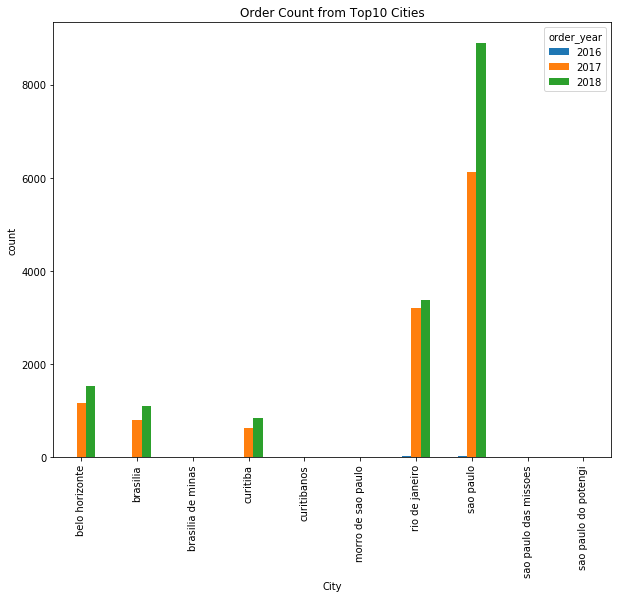

In [28]:
p1 = city_cr.plot(kind='bar', figsize=(10,8))
p1.set_xlabel('City')
p1.set_ylabel('count')
p1.set_title('Order Count from Top10 Cities')
plt.show(p1)

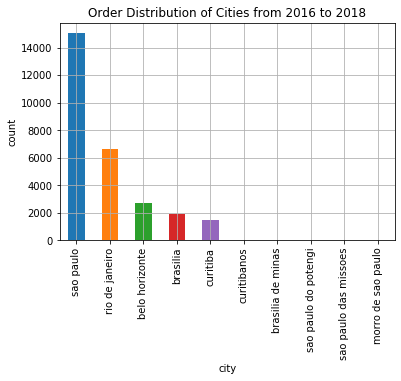

In [29]:
t = temp['customer_city'].value_counts()
plt.xlabel('city')
plt.ylabel('count')
plt.title('Order Distribution of Cities from 2016 to 2018')
t.plot(kind='bar', grid=True, color=['C0', 'C1', 'C2', 'C3','C4'])

In [30]:
m_table.columns

Index(['customer_id', 'customer_unique_id', 'zipcode', 'customer_city',
       'order_id', 'order_status', 'latitude', 'longitude', 'order_item_id',
       'price', 'freight_value', 'total_value', 'geometry', 'delivery_days',
       'est_delivery_days', 'order_day', 'order_month', 'order_year'],
      dtype='object')

In [31]:
dt = m_table[['customer_city','zipcode','latitude', 'longitude','price','freight_value','total_value',
              'delivery_days','est_delivery_days','order_day', 'order_month'
             ]]
dt

customer_city  zipcode   latitude  longitude   price  \
0                      franca    14409 -20.509897 -47.397866  124.99   
1       sao bernardo do campo     9790 -23.726853 -46.545746  289.00   
2                   sao paulo     1151 -23.527788 -46.660310  139.94   
3             mogi das cruzes     8775 -23.496930 -46.185352  149.94   
4                    campinas    13056 -22.987222 -47.151073  230.00   
...                       ...      ...        ...        ...     ...   
109885              sao paulo     3937 -23.587901 -46.501830   74.90   
109886        taboao da serra     6764 -23.612294 -46.765787  114.90   
109887              fortaleza    60115  -3.744128 -38.510859   37.00   
109888                 canoas    92120 -29.956391 -51.167614  689.00   
109889                  cotia     6703 -23.593985 -46.910591   13.99   

        freight_value  total_value  delivery_days  est_delivery_days  \
0               21.88       146.87              8                 19   
1               46.48       335.48             16                 24   
2               17.79       157.73             26                 24   
3               23.36       173.30             14                 27   
4               22.25       252.25             11                 16   
...               ...          ...            ...                ...   
109885          13.88        88.78              6                 17   
109886          14.16       129.06              7                 15   
109887          19.04        56.04             30                 23   
109888          22.07       711.07             12                 31   
109889           7.78        21.77              7                 19   

        order_day  order_month  
0              16            5  
1              12            1  
2              19            5  
3              13            3  
4              29            7  
...           ...          ...  
109885          7            4  
109886          4            4  
109887          8            4  
109888          3           11  
109889         19           12  

[96194 rows x 11 columns]

### Getting Mean Value of Data of each city:

In [32]:
dt = dt.groupby('customer_city').mean().reset_index()
dt

customer_city       zipcode   latitude  longitude       price  \
0     abadia dos dourados  38540.000000 -18.491105 -47.398266  119.633333   
1               abadiania  72940.000000 -16.194298 -48.711113  949.990000   
2                  abaete  35620.000000 -19.160506 -45.453776  144.400833   
3              abaetetuba  68440.000000  -1.724431 -48.886307  328.897273   
4                 abaiara  63240.000000  -7.341492 -39.024462  131.450000   
...                   ...           ...        ...        ...         ...   
4034             xinguara  68555.666667  -7.100444 -49.940808  140.024444   
4035          xique-xique  47400.000000 -10.818567 -42.723484   59.930000   
4036             zacarias  15265.000000 -21.051355 -50.051892   99.400000   
4037              ze doca  65365.000000  -3.274597 -45.654382  137.720000   
4038               zortea  89633.000000 -27.456341 -51.553877   49.900000   

      freight_value  total_value  delivery_days  est_delivery_days  order_day  \
0         18.200000   137.833333      11.333333          28.000000   2.000000   
1         75.530000  1025.520000      29.000000          44.000000  28.000000   
2         17.833333   162.234167       9.916667          22.916667  18.583333   
3         44.513636   373.410909      26.545455          35.727273   8.727273   
4         34.625000   166.075000      35.000000          32.000000  17.500000   
...             ...          ...            ...                ...        ...   
4034      32.136667   172.161111      32.111111          41.000000  17.222222   
4035      16.923333    76.853333      15.666667          31.666667  25.666667   
4036      15.525000   114.925000      14.500000          19.500000  14.500000   
4037      38.064000   175.784000      28.800000          32.600000  11.200000   
4038      18.885000    68.785000      20.000000          35.500000  15.500000   

      order_month  
0        6.333333  
1        1.000000  
2        6.416667  
3        6.272727  
4        8.000000  
...           ...  
4034     4.888889  
4035     2.666667  
4036     8.000000  
4037     5.800000  
4038     4.000000  

[4039 rows x 11 columns]

### Delivery_grade: (1-7), (8-15), (16-21), (22-30), (31-)

In [33]:
conditions = [
    ((dt['delivery_days'] >= 1) & (dt['delivery_days'] <= 7)),
    ((dt['delivery_days'] > 7) & (dt['delivery_days'] <= 15)),
    ((dt['delivery_days'] > 15) & (dt['delivery_days'] <= 21)),
    ((dt['delivery_days'] > 21) & (dt['delivery_days'] <= 30)),
    (dt['delivery_days'] > 30)]

values = [1, 2, 3, 4, 5]

dt['delivery_grade'] = np.select(conditions, values)

dt.head()

customer_city  zipcode   latitude  longitude       price  \
0  abadia dos dourados  38540.0 -18.491105 -47.398266  119.633333   
1            abadiania  72940.0 -16.194298 -48.711113  949.990000   
2               abaete  35620.0 -19.160506 -45.453776  144.400833   
3           abaetetuba  68440.0  -1.724431 -48.886307  328.897273   
4              abaiara  63240.0  -7.341492 -39.024462  131.450000   

   freight_value  total_value  delivery_days  est_delivery_days  order_day  \
0      18.200000   137.833333      11.333333          28.000000   2.000000   
1      75.530000  1025.520000      29.000000          44.000000  28.000000   
2      17.833333   162.234167       9.916667          22.916667  18.583333   
3      44.513636   373.410909      26.545455          35.727273   8.727273   
4      34.625000   166.075000      35.000000          32.000000  17.500000   

   order_month  delivery_grade  
0     6.333333               2  
1     1.000000               4  
2     6.416667               2  
3     6.272727               4  
4     8.000000               5

In [34]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_city      4039 non-null   object 
 1   zipcode            4039 non-null   float64
 2   latitude           4039 non-null   float64
 3   longitude          4039 non-null   float64
 4   price              4039 non-null   float64
 5   freight_value      4039 non-null   float64
 6   total_value        4039 non-null   float64
 7   delivery_days      4039 non-null   float64
 8   est_delivery_days  4039 non-null   float64
 9   order_day          4039 non-null   float64
 10  order_month        4039 non-null   float64
 11  delivery_grade     4039 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 378.8+ KB


In [35]:
dt.describe()

zipcode     latitude    longitude        price  freight_value  \
count   4039.000000  4039.000000  4039.000000  4039.000000    4039.000000   
mean   55320.270459   -18.032362   -46.260238   135.215431      26.080747   
std    26467.735178     7.597120     5.744139   133.979448      14.164282   
min     4146.507179   -33.691423   -69.259052     5.900000       0.000000   
25%    35876.500000   -23.148320   -50.586493    75.570333      17.670000   
50%    55814.200000   -20.247942   -46.798729   108.977143      21.285000   
75%    78564.000000   -11.819023   -41.876246   151.618333      30.342286   
max    99980.000000     3.844901   -34.808186  2200.000000     203.380000   

       total_value  delivery_days  est_delivery_days    order_day  \
count  4039.000000    4039.000000        4039.000000  4039.000000   
mean    161.296178      15.539850          27.965948    15.275766   
std     140.278394       7.769089           6.268538     5.789859   
min      20.420000       2.000000           8.000000     1.000000   
25%      96.816667      10.857143          23.955663    12.000000   
50%     133.050000      14.000000          27.250000    15.353909   
75%     179.878846      18.348485          31.375000    18.400000   
max    2324.990000     148.000000          87.000000    31.000000   

       order_month  delivery_grade  
count  4039.000000     4039.000000  
mean      6.006050        2.555831  
std       2.169493        0.892870  
min       1.000000        1.000000  
25%       4.857143        2.000000  
50%       6.000000        2.000000  
75%       7.000000        3.000000  
max      12.000000        5.000000

In [37]:
dt_numeric = dt[['price','freight_value','total_value','zipcode','latitude','longitude',
                 'est_delivery_days','delivery_grade','order_day','order_month']]
dt_numeric.head()

price  freight_value  total_value  zipcode   latitude  longitude  \
0  119.633333      18.200000   137.833333  38540.0 -18.491105 -47.398266   
1  949.990000      75.530000  1025.520000  72940.0 -16.194298 -48.711113   
2  144.400833      17.833333   162.234167  35620.0 -19.160506 -45.453776   
3  328.897273      44.513636   373.410909  68440.0  -1.724431 -48.886307   
4  131.450000      34.625000   166.075000  63240.0  -7.341492 -39.024462   

   est_delivery_days  delivery_grade  order_day  order_month  
0          28.000000               2   2.000000     6.333333  
1          44.000000               4  28.000000     1.000000  
2          22.916667               2  18.583333     6.416667  
3          35.727273               4   8.727273     6.272727  
4          32.000000               5  17.500000     8.000000

### Min-Max normalization performed on the full numeric data set:

In [44]:
dt_numeric_norm = (dt_numeric - dt_numeric.min()) / (dt_numeric.max() - dt_numeric.min())
dt_numeric_norm.head()

price  freight_value  total_value   zipcode  latitude  longitude  \
0  0.051836       0.089488     0.050948  0.358888  0.404950   0.634550   
1  0.430286       0.371374     0.436133  0.717844  0.466138   0.596442   
2  0.063124       0.087685     0.061536  0.328419  0.387116   0.690992   
3  0.147212       0.218869     0.153170  0.670888  0.851628   0.591357   
4  0.057222       0.170248     0.063203  0.616627  0.701985   0.877615   

   est_delivery_days  delivery_grade  order_day  order_month  
0           0.253165            0.25   0.033333     0.484848  
1           0.455696            0.75   0.900000     0.000000  
2           0.188819            0.25   0.586111     0.492424  
3           0.350978            0.75   0.257576     0.479339  
4           0.303797            1.00   0.550000     0.636364

### Perform correlation analysis:

In [45]:
dt_corr = dt_numeric_norm.corr()
dt_corr

price  freight_value  total_value   zipcode  latitude  \
price              1.000000       0.402300     0.995718  0.026879  0.124103   
freight_value      0.402300       1.000000     0.485208  0.159707  0.479107   
total_value        0.995718       0.485208     1.000000  0.041799  0.166907   
zipcode            0.026879       0.159707     0.041799  1.000000 -0.097100   
latitude           0.124103       0.479107     0.166907 -0.097100  1.000000   
longitude          0.067514       0.222694     0.086968 -0.397215  0.544982   
est_delivery_days  0.109713       0.381431     0.143300  0.344397  0.470602   
delivery_grade     0.067598       0.293483     0.094196  0.169622  0.416722   
order_day         -0.006397      -0.041518    -0.010302  0.006774  0.004560   
order_month        0.014156       0.032085     0.016760 -0.003079  0.031692   

                   longitude  est_delivery_days  delivery_grade  order_day  \
price               0.067514           0.109713        0.067598  -0.006397   
freight_value       0.222694           0.381431        0.293483  -0.041518   
total_value         0.086968           0.143300        0.094196  -0.010302   
zipcode            -0.397215           0.344397        0.169622   0.006774   
latitude            0.544982           0.470602        0.416722   0.004560   
longitude           1.000000           0.111784        0.200533   0.014723   
est_delivery_days   0.111784           1.000000        0.442488  -0.014221   
delivery_grade      0.200533           0.442488        1.000000  -0.011492   
order_day           0.014723          -0.014221       -0.011492   1.000000   
order_month         0.037637          -0.059870       -0.042001   0.030445   

                   order_month  
price                 0.014156  
freight_value         0.032085  
total_value           0.016760  
zipcode              -0.003079  
latitude              0.031692  
longitude             0.037637  
est_delivery_days    -0.059870  
delivery_grade       -0.042001  
order_day             0.030445  
order_month           1.000000

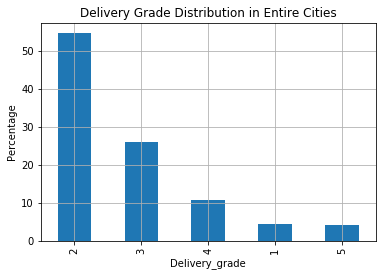

In [46]:
temp = (dt["delivery_grade"].value_counts()/dt["delivery_grade"].count())*100
plt.xlabel('Delivery_grade')
plt.ylabel('Percentage')
plt.title("Delivery Grade Distribution in Entire Cities")
temp.plot(kind='bar', grid = True)

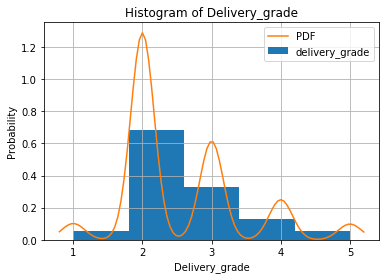

In [47]:
import scipy.stats as st

plt.hist(dt['delivery_grade'], density=True, bins = 5, label='delivery_grade')
mn, mx = plt.xlim()
kde_xs = np.linspace(mn, mx, 100)
kde = st.gaussian_kde(dt['delivery_grade'])
plt.plot(kde_xs, kde.pdf(kde_xs), label='PDF')
plt.legend(loc='upper right')
plt.ylabel('Probability')
plt.xlabel('Delivery_grade')
plt.title('Histogram of Delivery_grade')
plt.grid(True)
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

training = dt_numeric[['price','freight_value','total_value','latitude', 'longitude',
                       'zipcode','est_delivery_days','order_day', 'order_month']]
target = dt['delivery_grade']

x_train, x_test, y_train, y_test = train_test_split(training, target, test_size=0.2, random_state=33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3231, 9) (808, 9) (3231,) (808,)


In [49]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(x_train)

x_train_norm = min_max_scaler.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index)

x_test_norm = min_max_scaler.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

x_train_norm.head()

price  freight_value  total_value  latitude  longitude   zipcode  \
1461  0.015373       0.137608     0.020480  0.627660   0.094751  0.758644   
3040  0.036004       0.114138     0.038050  0.105923   0.449505  0.970991   
1610  0.029667       0.068624     0.028001  0.245186   0.622822  0.081167   
2489  0.055839       0.132687     0.058571  0.410143   0.834927  0.268001   
2401  0.034183       0.069968     0.032418  0.341480   0.709555  0.336245   

      est_delivery_days  order_day  order_month  
1461           0.420091   0.655556     0.393939  
3040           0.374429   0.355556     0.424242  
1610           0.378995   0.411111     0.424242  
2489           0.258111   0.526316     0.478469  
2401           0.164384   0.350000     0.727273

### KNN Classification

#### -With distance weighting

In [50]:
from sklearn import neighbors, tree, naive_bayes

# choose K = 5
k = 5

# create knn object
knn = neighbors.KNeighborsClassifier(k, weights='distance') # similarity of distance

# to fit the training data, labels(training portion)
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [51]:
knnpreds_test1 = knn.predict(x_test_norm)
print(knnpreds_test1)

[2 2 2 3 2 2 2 3 2 2 2 2 2 2 3 3 5 3 4 2 2 2 2 4 2 2 2 3 3 2 2 2 4 2 2 2 2
 2 2 2 3 3 2 2 2 5 3 3 2 2 2 2 2 2 2 3 2 2 3 2 2 3 2 2 2 3 2 3 2 3 3 3 2 2
 2 2 3 2 2 2 2 2 3 3 2 3 2 3 2 3 2 2 2 3 2 4 2 2 2 2 3 3 4 2 2 3 3 2 2 2 4
 2 2 2 4 4 2 2 3 2 4 3 2 2 3 2 2 3 2 2 2 2 2 2 3 4 2 2 4 4 2 2 3 2 2 2 2 2
 2 3 5 2 2 4 2 2 2 1 2 3 3 4 2 2 2 4 2 2 5 3 2 3 2 3 2 2 5 3 1 3 4 3 2 3 2
 2 2 2 2 3 2 3 2 3 2 3 3 2 2 2 3 2 2 2 3 3 3 2 2 2 2 3 2 2 2 2 2 2 3 2 2 3
 2 2 2 2 2 3 2 3 3 5 2 3 2 4 2 2 2 2 3 2 2 3 2 3 3 2 2 2 3 3 2 3 2 2 2 4 2
 2 2 2 3 4 2 3 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 5 4 2 2 5 2 2 2 2 2 2 2 3 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 3 1 5 2 5 3 2 2 2 2 3 5 3 2 2 3 2 2 2 2 2 2 2 2
 4 2 2 2 2 2 4 2 2 2 3 2 3 2 5 2 2 2 3 2 3 2 2 2 3 3 3 2 2 2 2 2 2 5 3 2 2
 2 2 2 3 2 2 2 2 3 4 2 2 2 2 2 2 2 4 1 2 3 4 3 2 2 3 2 2 3 2 2 4 2 4 2 2 3
 4 2 2 2 2 3 2 2 2 2 4 2 2 3 2 2 2 3 4 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2
 2 2 2 2 3 2 4 2 4 2 2 2 2 2 4 2 2 3 2 3 3 3 2 2 3 2 2 2 2 3 3 2 3 3 2 2 2
 3 2 3 2 3 3 3 2 2 3 2 4 

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knnpreds_test1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.69      0.82      0.75       454
           3       0.41      0.37      0.39       206
           4       0.44      0.29      0.35        94
           5       0.29      0.15      0.20        27

    accuracy                           0.59       808
   macro avg       0.37      0.33      0.34       808
weighted avg       0.55      0.59      0.57       808



In [53]:
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(y_test, knnpreds_test1)
print(knncm)

[[  0  24   3   0   0]
 [  8 373  61  10   2]
 [  0 106  76  20   4]
 [  1  26  36  27   4]
 [  0  10   8   5   4]]


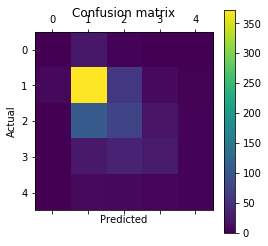

In [54]:
import pylab as plt
%matplotlib inline

plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [55]:
print("Test :",knn.score(x_test_norm, y_test))  # overall accuracy(avg) of (test instance and test label)
print("Training :",knn.score(x_train_norm, y_train)) # compare to the performance on the training data itself

Test : 0.594059405940594
Training : 1.0


In [56]:
# check the value from K=1 to K=20 with distance weighting
for k in range(1, 21):
    knn = neighbors.KNeighborsClassifier(k, weights='distance')
    knn.fit(x_train_norm, y_train)
    train_score = knn.score(x_train_norm, y_train)
    test_score = knn.score(x_test_norm, y_test)
    print("K = {}".format(k))
    print("Train score: {} , Test score: {}\n".format(train_score, test_score))

K = 1
Train score: 1.0 , Test score: 0.525990099009901

K = 2
Train score: 1.0 , Test score: 0.525990099009901

K = 3
Train score: 1.0 , Test score: 0.5754950495049505

K = 4
Train score: 1.0 , Test score: 0.5754950495049505

K = 5
Train score: 1.0 , Test score: 0.594059405940594

K = 6
Train score: 1.0 , Test score: 0.6101485148514851

K = 7
Train score: 1.0 , Test score: 0.6089108910891089

K = 8
Train score: 1.0 , Test score: 0.6237623762376238

K = 9
Train score: 1.0 , Test score: 0.6225247524752475

K = 10
Train score: 1.0 , Test score: 0.6287128712871287

K = 11
Train score: 1.0 , Test score: 0.6287128712871287

K = 12
Train score: 1.0 , Test score: 0.6373762376237624

K = 13
Train score: 1.0 , Test score: 0.6336633663366337

K = 14
Train score: 1.0 , Test score: 0.6361386138613861

K = 15
Train score: 1.0 , Test score: 0.6324257425742574

K = 16
Train score: 1.0 , Test score: 0.6274752475247525

K = 17
Train score: 1.0 , Test score: 0.6373762376237624

K = 18
Train score: 1.0 , 

In [57]:
# choose K = 12
k = 12

knn = neighbors.KNeighborsClassifier(k, weights='distance')
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')

In [58]:
knnpreds_test = knn.predict(x_test_norm)
print(knnpreds_test)

[2 2 2 3 2 2 2 3 2 2 2 2 2 2 3 3 2 3 4 2 2 2 2 4 2 2 2 3 2 2 2 2 3 2 2 2 2
 2 2 2 3 3 2 2 2 5 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 3 2 3 2 3 3 3 2 3
 2 2 3 2 2 2 2 2 3 3 2 2 2 3 2 4 2 2 2 2 2 4 2 2 2 2 3 2 4 3 2 3 3 2 2 2 3
 2 2 2 3 4 2 2 2 2 3 3 2 2 3 2 3 3 2 2 2 3 2 2 3 3 2 2 3 2 2 2 3 2 2 2 2 2
 2 3 3 2 2 4 2 2 2 2 2 3 3 3 2 2 2 2 2 2 4 3 2 3 2 2 2 2 4 3 2 3 2 3 2 3 2
 2 2 2 3 3 2 3 2 2 2 3 3 2 2 2 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 3
 2 2 2 2 2 3 2 3 4 2 2 3 2 3 2 2 2 2 3 2 2 3 2 3 3 3 2 3 3 3 2 3 2 2 2 2 2
 2 2 2 3 4 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 4 2 2 2 2 2 2 2 3 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 5 2 4 3 2 2 2 2 2 5 3 2 2 3 2 2 2 2 2 3 2 2
 4 2 2 2 2 2 4 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 2 2 3 3 3 2 2 2 2 2 2 3 3 2 2
 2 2 2 2 2 2 2 3 2 4 2 2 2 2 2 2 2 4 2 2 3 3 3 2 2 3 2 2 2 2 2 4 2 2 2 2 3
 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2
 2 2 2 2 3 2 3 2 4 2 2 2 2 2 2 2 2 3 2 3 3 2 2 3 2 2 2 2 3 3 2 4 3 3 2 2 2
 3 2 2 2 2 3 3 2 2 2 2 3 

In [59]:
print(classification_report(y_test, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.70      0.89      0.78       454
           3       0.48      0.42      0.45       206
           4       0.51      0.27      0.35        94
           5       0.33      0.04      0.07        27

    accuracy                           0.64       808
   macro avg       0.40      0.32      0.33       808
weighted avg       0.59      0.64      0.60       808



In [60]:
knncm = confusion_matrix(y_test, knnpreds_test)
print(knncm)

[[  0  26   1   0   0]
 [  0 402  46   5   1]
 [  0 107  87  12   0]
 [  0  26  42  25   1]
 [  0  12   7   7   1]]


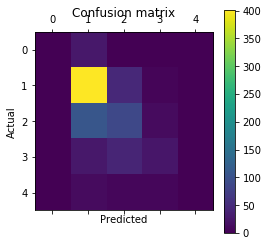

In [61]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [62]:
train_score = knn.score(x_train_norm, y_train)
test_score = knn.score(x_test_norm, y_test)
print("Train score: {} , Test score: {}\n".format(train_score, test_score))

Train score: 1.0 , Test score: 0.6373762376237624



#### -without distance weighting

In [70]:
# check the value from K=1 to K=20 without distance weighting
for k in range(1, 21):
    knn = neighbors.KNeighborsClassifier(k)
    knn.fit(x_train_norm, y_train)
    train_score = knn.score(x_train_norm, y_train)
    test_score = knn.score(x_test_norm, y_test)
    print("K = {}".format(k))
    print("Train score: {} , Test score: {}\n".format(train_score, test_score))

K = 1
Train score: 1.0 , Test score: 0.525990099009901

K = 2
Train score: 0.7486846177653977 , Test score: 0.5334158415841584

K = 3
Train score: 0.7109254100897555 , Test score: 0.5742574257425742

K = 4
Train score: 0.6861652739090065 , Test score: 0.5742574257425742

K = 5
Train score: 0.6728567007118539 , Test score: 0.5928217821782178

K = 6
Train score: 0.6675951717734447 , Test score: 0.6014851485148515

K = 7
Train score: 0.6576911173011452 , Test score: 0.6051980198019802

K = 8
Train score: 0.649025069637883 , Test score: 0.6126237623762376

K = 9
Train score: 0.6453110492107706 , Test score: 0.6262376237623762

K = 10
Train score: 0.6313834726090993 , Test score: 0.6262376237623762

K = 11
Train score: 0.6298359640978025 , Test score: 0.6225247524752475

K = 12
Train score: 0.6255029402661715 , Test score: 0.629950495049505

K = 13
Train score: 0.6217889198390592 , Test score: 0.6361386138613861

K = 14
Train score: 0.6180748994119468 , Test score: 0.6311881188118812

K = 1

In [71]:
# choose K = 13
k = 13

knn = neighbors.KNeighborsClassifier(k)
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [72]:
knnpreds_test = knn.predict(x_test_norm)
print(knnpreds_test)

[2 2 2 2 2 2 2 3 3 2 2 2 2 2 3 3 2 3 4 2 2 2 2 4 2 2 2 3 2 2 2 2 3 2 2 2 4
 2 2 2 3 3 2 2 2 3 2 3 2 2 2 2 2 1 2 2 2 2 3 2 2 3 2 2 2 3 2 3 2 3 3 3 2 3
 2 2 3 2 2 2 2 2 3 3 2 2 2 3 2 3 2 2 2 2 2 4 2 2 2 2 3 2 3 3 2 3 3 2 2 2 3
 2 2 2 3 4 2 2 2 2 3 3 2 2 3 2 3 3 2 2 2 2 2 2 3 3 2 2 3 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 3 2 2 2 1 2 3 2 3 2 2 2 2 2 2 4 3 2 3 2 2 2 2 2 3 1 3 2 2 2 3 2
 2 2 2 3 3 2 3 2 2 2 3 2 2 2 3 2 3 2 2 2 5 2 2 2 2 2 3 2 2 2 2 2 2 3 2 2 3
 2 2 2 2 2 2 2 3 4 2 2 3 2 3 2 2 2 2 3 2 2 2 2 3 3 3 2 3 3 3 2 3 2 2 2 2 2
 2 2 2 3 4 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 4 2 2 2 2 2 2 2 3 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 4 2 4 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2
 4 2 2 2 2 2 4 2 2 2 3 2 3 2 2 2 2 2 2 2 3 2 2 3 2 3 3 2 2 2 2 2 2 3 3 2 2
 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 4 2 2 3 3 3 2 2 3 2 2 2 4 3 4 2 2 2 2 3
 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2
 2 2 2 2 3 2 3 2 4 2 2 2 2 2 2 2 2 3 2 3 3 3 2 3 2 2 2 2 3 2 2 4 3 3 2 2 2
 3 2 2 2 2 3 3 2 2 2 2 3 

In [73]:
print(classification_report(y_test, knnpreds_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.69      0.90      0.78       454
           3       0.48      0.40      0.43       206
           4       0.57      0.27      0.36        94
           5       0.00      0.00      0.00        27

    accuracy                           0.64       808
   macro avg       0.35      0.31      0.32       808
weighted avg       0.58      0.64      0.59       808



In [74]:
knncm = confusion_matrix(y_test, knnpreds_test)
print(knncm)

[[  0  26   1   0   0]
 [  3 407  39   5   0]
 [  0 116  82   8   0]
 [  0  27  41  25   1]
 [  0  12   9   6   0]]


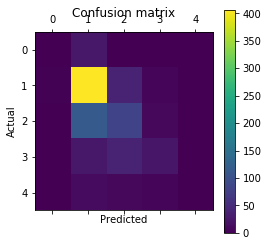

In [75]:
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [76]:
train_score = knn.score(x_train_norm, y_train)
test_score = knn.score(x_test_norm, y_test)
print("Train score: {} , Test score: {}\n".format(train_score, test_score))

Train score: 0.6217889198390592 , Test score: 0.6361386138613861



#### With Weighting:
Train score: 1.0 , Test score: 0.6373762376237624

#### Without Weighting:
Train score: 0.6217889198390592 , Test score: 0.6361386138613861

### Regression

In [77]:
# standard linear regressioin

def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [78]:
# In order to do multiple regression we need to add a column of 1s as the coefficient for x0
x = np.array([np.concatenate((v,[1])) for v in np.array(x_train)])
y = np.array(y_train)
print(x.shape)
print(y.shape)

(3231, 10)
(3231,)


In [79]:
w = standRegres(x, y)
print(w)

[[ 6.42061544e-03]
 [ 6.79573178e-03]
 [-2.09603520e-03]
 [ 2.89057138e-02]
 [ 1.14096764e-02]
 [ 4.51449038e-06]
 [ 3.42159441e-02]
 [ 1.22615972e-03]
 [-1.71116604e-02]
 [ 2.41086348e+00]]


In [80]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w

In [81]:
yHat.shape

(3231, 1)

In [82]:
# Now we can constuct an array of errors
err = abs(yHat.T-y)

# Let's see the error on the first 10 predictions
print(err[:10])

[[1.26109031 0.98114324 1.7195399  ... 0.48619929 1.92828659 0.47297852]]


In [83]:
# Compute the RMSE value on the full trainin data(the 80% partition)
total_error = np.dot(err, err.T)

rmse_train = np.sqrt(total_error/len(yHat))
print("RMSE value on the full training data: %.8f" %rmse_train)

RMSE value on the full training data: 1.17753244


In [84]:
from sklearn.model_selection import KFold

def cross_validate(model, X, y, n, verbose=False):
    kf = KFold(n_splits=n, shuffle=True, random_state=22)
    xval_err = 0
    f = 1
    for train, test in kf.split(x):
        w = model(x[train], y[train])
        yHat = x[test] * w
        err = abs(yHat.T - y[test])
        total_error = np.dot(err, err.T)
        rmse = np.sqrt(total_error/len(yHat))
        if verbose:
            print("Fold %2d RMSE: %.5f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [85]:
# 10-fold cross-validation
rmse_10cv = cross_validate(standRegres, x, y, 10, verbose=True)

Fold  1 RMSE: 18.45105
Fold  2 RMSE: 0.72106
Fold  3 RMSE: 2.61427
Fold  4 RMSE: 140.96357
Fold  5 RMSE: 1.74211
Fold  6 RMSE: 1.08309
Fold  7 RMSE: 0.84364
Fold  8 RMSE: 25.44896
Fold  9 RMSE: 1.03408
Fold 10 RMSE: 3.37084


In [86]:
print('Standard linear regression')
print('RMSE on training: %.8f' %rmse_train)
print('RMSE on 10-flod CV: %.8f' %rmse_10cv)

Standard linear regression
RMSE on training: 1.17753244
RMSE on 10-flod CV: 19.62726848


In [87]:
from sklearn import feature_selection
from sklearn.linear_model  import LinearRegression

# Create linear regression object
linreg = LinearRegression()

In [88]:
def featureSeclection(x_train, target, model, cv_num):
    
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import mean_absolute_error
    
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        x_train_fs = fs.fit_transform(x_train, target)
        scores = cross_val_score(model, x_train_fs, target, scoring='neg_mean_absolute_error', cv=cv_num) 
        MAE = abs(scores.mean())
        print("%2d %0.12f" %(i, MAE))
        results = np.append(results, MAE)
        
    return percentiles, results

In [89]:
percentiles, results = featureSeclection(x_train, y_train, linreg, 5) # k-fold cross-validatin: k=5
    
optimal_percentile_ind = np.where(results == results.min())[0][0]
percentiles_feature = percentiles[optimal_percentile_ind]
feature_number = int(percentiles[optimal_percentile_ind]*len(training.columns)/100) 
print("\nOptimal percentile of index: {0}".format(optimal_percentile_ind))
print("Optimal percentile of features: {0}".format(percentiles_feature))
print("Optimal number of features: {0}".format(feature_number))
print("Optimal percentile: {0}".format(results[optimal_percentile_ind]))

 1 0.622119447228
 6 0.622119447228
11 0.622119447228
16 0.587216591150
21 0.587216591150
26 0.586352955149
31 0.586352955149
36 0.586352955149
41 0.586742934993
46 0.586742934993
51 0.583204099562
56 0.583204099562
61 0.583204099562
66 0.583310527135
71 0.583310527135
76 0.583310527135
81 0.583310527135
86 0.583310527135
91 0.583349641565
96 0.583349641565

Optimal percentile of index: 10
Optimal percentile of features: 51
Optimal number of features: 4
Optimal percentile: 0.5832040995615267


Text(0.5, 1.0, 'Optimal percentile of features:51')

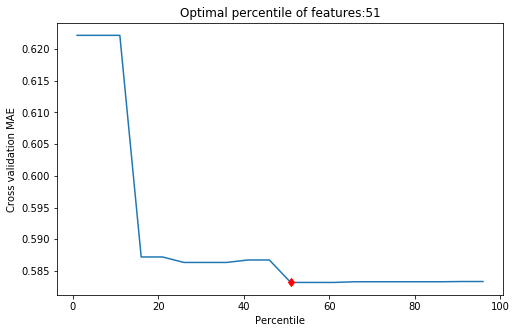

In [90]:
pl.figure(figsize=(8,5))
pl.xlabel("Percentile")
pl.ylabel("Cross validation MAE")
pl.plot(percentiles, results)
plt.plot(percentiles[optimal_percentile_ind], results[optimal_percentile_ind],'rd')
plt.title('Optimal percentile of features:{}'.format(percentiles[optimal_percentile_ind]))

In [91]:
from sklearn import metrics

def measure_performance(X, y, model):
    y_pred = model.predict(X)
    MAE = metrics.mean_absolute_error(y, y_pred)
    return MAE

In [92]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=percentiles_feature)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
mae = measure_performance(x_test_fs, y_test, linreg)
print('Linear regression >> MAE on the test: {}'.format(mae))

Linear regression >> MAE on the test: 0.5370934825786963


### Perform Ridge Regression and Lasso Regression

In [93]:
from sklearn.linear_model import Ridge, Lasso

def calc_params(X, y, model, param_values, param_name, K):

    # convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    # initialize training/test score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different prarameter values
    for i, param_value in enumerate(param_values):
       
        # set model parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
 
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):

            #fit the model in the corresponding fold
            model.fit(X[train], y[train])

            k_train_scores[j] = measure_performance(X[train], y[train], model)
            k_test_scores[j] = measure_performance(X[test],  y[test], model) 
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
    
    # plot the training/test scores 
    plt.figure(figsize=(8,5))
    plt.plot(param_values, train_scores, label='Training', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='CV', alpha=0.4, lw=2, c='g')
    plt.legend()
    plt.xlabel(param_name +' values')
    plt.ylabel("Error")
    plt.title('Mean cross-validation Error')    
    
    min_idx = np.where(test_scores == test_scores.min())
    min_alpha = param_values[min_idx]
    print('Minimun MAE: {}'.format(test_scores[min_idx][0]))
    print('{}: {}'.format(param_name, min_alpha[0]))

    return train_scores, test_scores    

In [94]:
alpha = np.linspace(.01, 10, 50)
alpha = np.array([float(e) for e in alpha])
print(alpha)

[ 0.01        0.21387755  0.4177551   0.62163265  0.8255102   1.02938776
  1.23326531  1.43714286  1.64102041  1.84489796  2.04877551  2.25265306
  2.45653061  2.66040816  2.86428571  3.06816327  3.27204082  3.47591837
  3.67979592  3.88367347  4.08755102  4.29142857  4.49530612  4.69918367
  4.90306122  5.10693878  5.31081633  5.51469388  5.71857143  5.92244898
  6.12632653  6.33020408  6.53408163  6.73795918  6.94183673  7.14571429
  7.34959184  7.55346939  7.75734694  7.96122449  8.16510204  8.36897959
  8.57285714  8.77673469  8.98061224  9.1844898   9.38836735  9.5922449
  9.79612245 10.        ]


#### Ridge Regression

Ridge Regression
Minimun MAE: 0.5830867646303443
alpha: 0.01


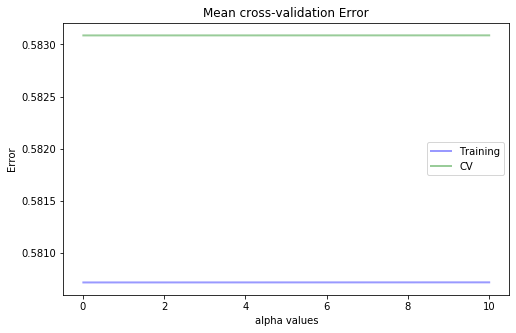

In [95]:
ridge = Ridge()
print('Ridge Regression')
train_scores, test_scores = calc_params(x, y, ridge, alpha, 'alpha', 5)

#### Lasso Regression

Lasso Regression
Minimun MAE: 0.583029625077941
alpha: 0.01


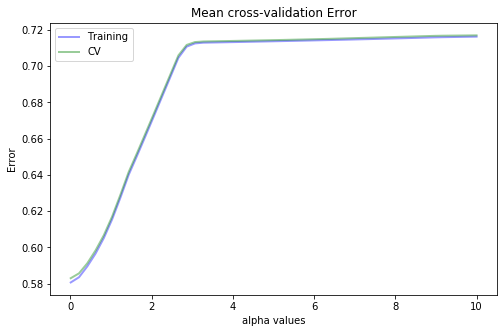

In [96]:
lasso = Lasso()
print('Lasso Regression')
train_scores, test_scores = calc_params(x, y, lasso, alpha, 'alpha', 5)

In [97]:
# Ridge) alpha: 0.01
# Lasso) alpha: 0.01

a1 = 0.01
ridge = Ridge(alpha=a1)
ridge.fit(x_train, y_train)
r_mae = measure_performance(x_test, y_test, ridge)
print("Ridge Regression >> MAE on test: ", r_mae, "\n")

a2 = 0.01
lasso = Lasso(alpha=a2)
lasso.fit(x_train, y_train)
l_mae = measure_performance(x_test, y_test, lasso)
print("Lasso Regression >> MAE on test: ", l_mae)

Ridge Regression >> MAE on test:  0.5362442692445412 

Lasso Regression >> MAE on test:  0.5363146331943932


### K-means Clustering and Principal Component Analysis (PCA)

In [172]:
dt_numeric = dt[['price','freight_value','total_value','latitude', 'longitude',
                 'zipcode','est_delivery_days','order_day', 'order_month']]

min_max_scaler = preprocessing.MinMaxScaler().fit(dt_numeric)
dt_norm = min_max_scaler.transform(dt_numeric)

np.set_printoptions(precision=3, suppress=True)
dt_norm

array([[0.052, 0.089, 0.051, ..., 0.253, 0.033, 0.485],
       [0.43 , 0.371, 0.436, ..., 0.456, 0.9  , 0.   ],
       [0.063, 0.088, 0.062, ..., 0.189, 0.586, 0.492],
       ...,
       [0.043, 0.076, 0.041, ..., 0.146, 0.45 , 0.636],
       [0.06 , 0.187, 0.067, ..., 0.311, 0.34 , 0.436],
       [0.02 , 0.093, 0.021, ..., 0.348, 0.483, 0.273]])

In [173]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1) # initialization
kmeans.fit(dt_norm)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 498.0590100183314
start iteration
done sorting
end inner loop
Iteration 1, inertia 441.21194854256305
start iteration
done sorting
end inner loop
Iteration 2, inertia 430.46800419312257
start iteration
done sorting
end inner loop
Iteration 3, inertia 428.480799857305
start iteration
done sorting
end inner loop
Iteration 4, inertia 427.8067287457587
start iteration
done sorting
end inner loop
Iteration 5, inertia 427.24138862847155
start iteration
done sorting
end inner loop
Iteration 6, inertia 426.67038601912753
start iteration
done sorting
end inner loop
Iteration 7, inertia 426.13869581637454
start iteration
done sorting
end inner loop
Iteration 8, inertia 425.79515294000726
start iteration
done sorting
end inner loop
Iteration 9, inertia 425.59145227283176
start iteration
done sorting
end inner loop
Iteration 10, inertia 425.43591367659576
start iteration
done sorting
end inner loop
Iteration 1

Iteration 20, inertia 420.8235213587751
start iteration
done sorting
end inner loop
Iteration 21, inertia 420.7640182200643
start iteration
done sorting
end inner loop
Iteration 22, inertia 420.70524108107315
start iteration
done sorting
end inner loop
Iteration 23, inertia 420.66818605047
start iteration
done sorting
end inner loop
Iteration 24, inertia 420.6372624634171
start iteration
done sorting
end inner loop
Iteration 25, inertia 420.6287662729852
start iteration
done sorting
end inner loop
Iteration 26, inertia 420.61906743536827
start iteration
done sorting
end inner loop
Iteration 27, inertia 420.59302047333347
start iteration
done sorting
end inner loop
Iteration 28, inertia 420.5446828987315
start iteration
done sorting
end inner loop
Iteration 29, inertia 420.50608274434455
start iteration
done sorting
end inner loop
Iteration 30, inertia 420.4712377855182
start iteration
done sorting
end inner loop
Iteration 31, inertia 420.45609931311117
start iteration
done sorting
end 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [174]:
clusters = kmeans.predict(dt_norm)
pd.DataFrame(clusters, columns=["Cluster"])

Cluster
0           0
1           1
2           0
3           1
4           2
...       ...
4034        1
4035        4
4036        0
4037        4
4038        3

[4039 rows x 1 columns]

In [175]:
kmeans.cluster_centers_

array([[0.053, 0.098, 0.053, 0.338, 0.682, 0.239, 0.201, 0.466, 0.434],
       [0.064, 0.153, 0.068, 0.562, 0.491, 0.741, 0.306, 0.463, 0.456],
       [0.07 , 0.16 , 0.075, 0.603, 0.83 , 0.503, 0.286, 0.619, 0.722],
       [0.053, 0.108, 0.054, 0.187, 0.506, 0.9  , 0.246, 0.479, 0.443],
       [0.069, 0.18 , 0.075, 0.676, 0.857, 0.544, 0.313, 0.418, 0.361]])

In [176]:
names = ['price','freight_value','total_value','latitude', 'longitude',
         'zipcode','est_delivery_days','order_day', 'order_month']

centroids = pd.DataFrame(kmeans.cluster_centers_.T, 
                         columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'],
                         index=names)
centroids

Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
price               0.053011   0.063857   0.070230   0.053175   0.068675
freight_value       0.098234   0.153452   0.160110   0.108304   0.179850
total_value         0.052839   0.068037   0.074693   0.053883   0.074954
latitude            0.338162   0.562135   0.603283   0.186634   0.675570
longitude           0.682123   0.490571   0.829574   0.506151   0.857087
zipcode             0.239311   0.741395   0.502546   0.900223   0.544385
est_delivery_days   0.201411   0.305610   0.286469   0.245561   0.312780
order_day           0.465850   0.462741   0.618777   0.479248   0.418463
order_month         0.433630   0.455875   0.721703   0.443460   0.361486

In [177]:
from sklearn import metrics

silhouettes = metrics.silhouette_samples(dt_norm, clusters)
print(silhouettes[:20])

[ 0.193  0.028  0.429 -0.002  0.099  0.084  0.238  0.187  0.419  0.351  0.075  0.102  0.36   0.252
  0.06   0.028  0.152  0.074  0.442  0.366]


In [178]:
print(silhouettes.mean())

0.29603055287703667


In [179]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def plot_silhouettes(dt_norm, clusters, metric='euclidean'):
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(dt_norm, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        
        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color='red', linestyle='--')
    
    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')
    
    pl.tight_layout()
    pl.show()
    
    return

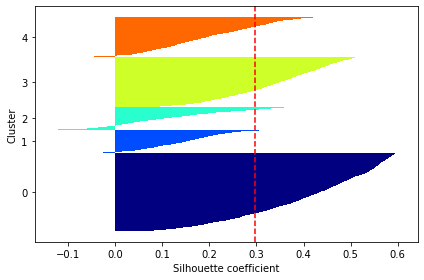

In [180]:
plot_silhouettes(dt_norm, clusters)

In [181]:
grades = dt['delivery_grade']
pd.DataFrame(grades)

delivery_grade
0                  2
1                  4
2                  2
3                  4
4                  5
...              ...
4034               5
4035               3
4036               2
4037               4
4038               3

[4039 rows x 1 columns]

In [182]:
from sklearn.metrics import completeness_score, homogeneity_score

print("Completeness: ", completeness_score(dt['delivery_grade'], clusters))
print("Homogeneity : ", homogeneity_score(dt['delivery_grade'], clusters))

Completeness:  0.0879947289285163
Homogeneity :  0.1110748349198979


#### Perform PCA on the normalized data matrix:

In [183]:
from sklearn import decomposition

pca = decomposition.PCA(svd_solver='randomized')
XTrans = pca.fit_transform(dt_norm)

np.set_printoptions(precision=3, suppress=True)
print(XTrans)

[[-0.143 -0.104 -0.176 ...  0.017 -0.029 -0.   ]
 [ 0.199  0.169 -0.226 ...  0.113 -0.02   0.   ]
 [-0.19  -0.103  0.094 ... -0.032 -0.019 -0.   ]
 ...
 [-0.325 -0.272  0.171 ... -0.036 -0.001  0.   ]
 [-0.007  0.373 -0.125 ... -0.044 -0.002 -0.   ]
 [ 0.448 -0.137 -0.137 ...  0.102 -0.005  0.   ]]


In [184]:
print(pca.explained_variance_ratio_)

[0.357 0.214 0.164 0.153 0.053 0.034 0.015 0.01  0.   ]


In [185]:
meanVals = np.mean(dt_norm, axis=0)
meanRemoved = dt_norm - meanVals
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=5, suppress=True, linewidth=100)
print(covMat)

[[ 0.00373  0.00171  0.0037   0.00153  0.00069  0.00045  0.00053 -0.00008  0.00017]
 [ 0.00171  0.00485  0.00206  0.00675  0.00259  0.00307  0.00211 -0.00056  0.00044]
 [ 0.0037   0.00206  0.00371  0.00206  0.00088  0.0007   0.00069 -0.00012  0.0002 ]
 [ 0.00153  0.00675  0.00206  0.04096  0.01839 -0.00543  0.00756  0.00018  0.00127]
 [ 0.00069  0.00259  0.00088  0.01839  0.0278  -0.01829  0.00148  0.00047  0.00124]
 [ 0.00045  0.00307  0.0007  -0.00543 -0.01829  0.07628  0.00755  0.00036 -0.00017]
 [ 0.00053  0.00211  0.00069  0.00756  0.00148  0.00755  0.0063  -0.00022 -0.00094]
 [-0.00008 -0.00056 -0.00012  0.00018  0.00047  0.00036 -0.00022  0.03725  0.00116]
 [ 0.00017  0.00044  0.0002   0.00127  0.00124 -0.00017 -0.00094  0.00116  0.0389 ]]


In [186]:
import numpy.linalg as la
eigVals, eigVects = la.eig(np.mat(covMat))
print("eigen Values: \n",eigVals)
print("eigen Vectors: \n", eigVects)

eigen Values: 
 [ 0.08564  0.05129  0.03939  0.03665  0.01262  0.00807 -0.       0.00244  0.00367]
eigen Vectors: 
 [[ 0.00245  0.04835  0.00424  0.00422  0.04215  0.63949 -0.68813  0.32705  0.08006]
 [-0.00293  0.17534  0.0227   0.01546  0.07549  0.38208 -0.06379 -0.89803 -0.07922]
 [ 0.00207  0.0615   0.00604  0.00539  0.04679  0.64256  0.72278  0.23212  0.06923]
 [ 0.24878  0.79252  0.09611 -0.02108  0.45466 -0.17186 -0.       0.10059  0.23231]
 [ 0.36161  0.38101  0.02858 -0.02022 -0.84933  0.02207  0.       0.01408 -0.02826]
 [-0.89658  0.36258  0.01536 -0.00099 -0.22277 -0.03832 -0.       0.0292   0.11178]
 [-0.05513  0.2138   0.05624 -0.01336  0.10944  0.02165  0.       0.14587 -0.95613]
 [-0.00147  0.03013 -0.46879 -0.88236  0.01851  0.01323  0.      -0.01326 -0.00803]
 [ 0.02059  0.10863 -0.87533  0.46917  0.01788 -0.00707  0.       0.00838 -0.03177]]


In [187]:
eigValInd = np.argsort(eigVals) #sort, sort goes smallest to largest 
eigValInd = eigValInd[::-1] #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[ 0.08564  0.05129  0.03939  0.03665  0.01262  0.00807  0.00367  0.00244 -0.     ]
[35.71673 21.39068 16.42807 15.28736  5.26272  3.36518  1.52994  1.01932 -0.     ]


<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

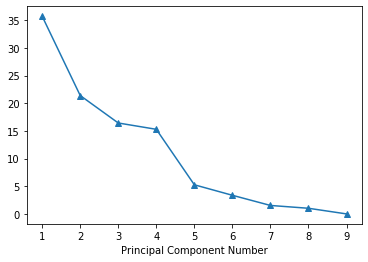

In [192]:
import matplotlib.pyplot as plt 
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 10), varPercentage[:10], marker='^') 
plt.xlabel('Principal Component Number') 
plt.ylabel

In [235]:
total_percentage = 0
for i in range(5):
    total_percentage += varPercentage[i]
    print("{}: {}".format(i+1, total_percentage))

1: 35.71672613192309
2: 57.10740420655121
3: 73.535475662204
4: 88.82283511519239
5: 94.08555565940941


In [236]:
topNfeat = 5
topEigValInd = eigValInd[:topNfeat]
reducedEigVects = eigVects[:, topEigValInd]
reducedDT = np.dot(meanRemoved, reducedEigVects)
print(reducedDT)

[[ 0.14332 -0.10353  0.17565  0.40484  0.05019]
 [-0.19859  0.16875  0.2258  -0.5829   0.11521]
 [ 0.18956 -0.10261 -0.09423 -0.07916  0.0051 ]
 ...
 [ 0.32468 -0.27235 -0.17124  0.11265  0.13551]
 [ 0.00662  0.37348  0.12466  0.10251  0.14883]
 [-0.44814 -0.13745  0.13726 -0.08631 -0.06228]]


In [237]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1)
kmeans.fit(reducedDT)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 387.1371763929658
start iteration
done sorting
end inner loop
Iteration 1, inertia 379.1350513241808
start iteration
done sorting
end inner loop
Iteration 2, inertia 377.28135198427776
start iteration
done sorting
end inner loop
Iteration 3, inertia 376.4155708650724
start iteration
done sorting
end inner loop
Iteration 4, inertia 375.7203388134461
start iteration
done sorting
end inner loop
Iteration 5, inertia 375.159825745459
start iteration
done sorting
end inner loop
Iteration 6, inertia 374.75193881584454
start iteration
done sorting
end inner loop
Iteration 7, inertia 374.28592830249136
start iteration
done sorting
end inner loop
Iteration 8, inertia 373.8811035241291
start iteration
done sorting
end inner loop
Iteration 9, inertia 373.6846209760398
start iteration
done sorting
end inner loop
Iteration 10, inertia 373.62183183768605
start iteration
done sorting
end inner loop
Iteration 11, i

Iteration 3, inertia 372.82895124925926
start iteration
done sorting
end inner loop
Iteration 4, inertia 371.6727096990491
start iteration
done sorting
end inner loop
Iteration 5, inertia 370.9096618167121
start iteration
done sorting
end inner loop
Iteration 6, inertia 370.1883277368014
start iteration
done sorting
end inner loop
Iteration 7, inertia 369.7049484977899
start iteration
done sorting
end inner loop
Iteration 8, inertia 369.50832587264415
start iteration
done sorting
end inner loop
Iteration 9, inertia 369.41147728437335
start iteration
done sorting
end inner loop
Iteration 10, inertia 369.3670165974515
start iteration
done sorting
end inner loop
Iteration 11, inertia 369.32852919533264
start iteration
done sorting
end inner loop
Iteration 12, inertia 369.2697487177861
start iteration
done sorting
end inner loop
Iteration 13, inertia 369.1893057580103
start iteration
done sorting
end inner loop
Iteration 14, inertia 369.1122130517553
start iteration
done sorting
end inner 

Iteration 8, inertia 363.5973378079386
start iteration
done sorting
end inner loop
Iteration 9, inertia 363.57830092224833
start iteration
done sorting
end inner loop
Iteration 10, inertia 363.56900964467025
start iteration
done sorting
end inner loop
Iteration 11, inertia 363.56900964467025
center shift 0.000000e+00 within tolerance 4.510614e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 394.81621874704626
start iteration
done sorting
end inner loop
Iteration 1, inertia 386.0151572446165
start iteration
done sorting
end inner loop
Iteration 2, inertia 382.67721668287993
start iteration
done sorting
end inner loop
Iteration 3, inertia 379.99903657514955
start iteration
done sorting
end inner loop
Iteration 4, inertia 378.5248409496228
start iteration
done sorting
end inner loop
Iteration 5, inertia 377.3441109376398
start iteration
done sorting
end inner loop
Iteration 6, inertia 376.4751973662952
start iteration
done sorting
end inner loop

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [238]:
clusters= kmeans.predict(reducedDT)
clusters

array([1, 3, 1, ..., 1, 0, 4], dtype=int32)

In [245]:
centroids = pd.DataFrame(kmeans.cluster_centers_, 
                         columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
centroids

Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
0   0.119152   0.290783   0.144244  -0.001330  -0.038212
1   0.252358  -0.183665   0.006824   0.000213   0.008387
2   0.133571   0.250397  -0.273723  -0.008150  -0.029120
3  -0.217291   0.137997   0.022605   0.011433   0.177932
4  -0.443910  -0.118338  -0.013474  -0.000964  -0.052308

In [246]:
silhouettes = metrics.silhouette_samples(reducedDT, clusters)
print(silhouettes[:20])
print("Silhouettes Mean: ", silhouettes.mean())

[ 0.18336  0.06913  0.43305 -0.00469  0.13043  0.11218  0.26748  0.19336  0.43639  0.3619   0.10647
  0.08982  0.38802  0.24474  0.04239  0.03925  0.1513   0.08722  0.47877  0.39804]
Silhouettes Mean:  0.3138263076620892


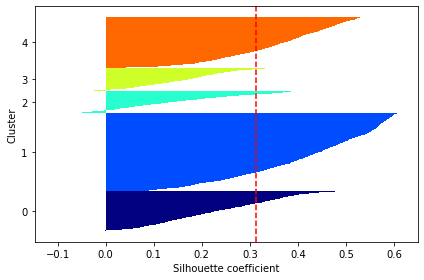

In [247]:
plot_silhouettes(reducedDT, clusters)

In [248]:
print("Completeness: ", completeness_score(dt['delivery_grade'], clusters))
print("Homogeneity : ", homogeneity_score(dt['delivery_grade'], clusters))

Completeness:  0.08768683276634853
Homogeneity :  0.1106403978843769


### Random Forest

In [201]:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True): 
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n") 
    if show_classification_report:
        print("Classification report") 
        print(metrics.classification_report(y, y_pred),"\n")
    if show_confussion_matrix:
        print("Confussion matrix") 
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [202]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf = rf.fit(x_train, y_train)

measure_performance(x_test, y_test, rf, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.603 

Classification report
              precision    recall  f1-score   support

           1       0.09      0.07      0.08        27
           2       0.69      0.83      0.75       454
           3       0.45      0.40      0.43       206
           4       0.47      0.24      0.32        94
           5       0.25      0.07      0.11        27

    accuracy                           0.60       808
   macro avg       0.39      0.33      0.34       808
weighted avg       0.57      0.60      0.58       808
 

Confussion matrix
[[  2  25   0   0   0]
 [ 14 377  57   6   0]
 [  5 105  83  13   0]
 [  1  30  34  23   6]
 [  0   9   9   7   2]] 



In [203]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf = rf.fit(x_train, y_train)

measure_performance(x_test, y_test, rf, show_confussion_matrix=True, show_classification_report=True)

Accuracy:0.603 

Classification report
              precision    recall  f1-score   support

           1       0.09      0.07      0.08        27
           2       0.69      0.83      0.75       454
           3       0.45      0.40      0.43       206
           4       0.47      0.24      0.32        94
           5       0.25      0.07      0.11        27

    accuracy                           0.60       808
   macro avg       0.39      0.33      0.34       808
weighted avg       0.57      0.60      0.58       808
 

Confussion matrix
[[  2  25   0   0   0]
 [ 14 377  57   6   0]
 [  5 105  83  13   0]
 [  1  30  34  23   6]
 [  0   9   9   7   2]] 



In [204]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [205]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [253]:
msl = range(1,21)
print(msl)

range(1, 21)


min_samples_leaf = 1 Train = 0.9798823289877898 Test = 0.5391509275962887
min_samples_leaf = 2 Train = 0.9294335922295215 Test = 0.5552461707045138
min_samples_leaf = 3 Train = 0.8655212855782647 Test = 0.5530751599427699
min_samples_leaf = 4 Train = 0.8187097208831615 Test = 0.5601944674396238
min_samples_leaf = 5 Train = 0.7798666095777617 Test = 0.5663806757552121
min_samples_leaf = 6 Train = 0.7590527932643076 Test = 0.5710265526531121
min_samples_leaf = 7 Train = 0.7346800426370284 Test = 0.5716438336499491
min_samples_leaf = 8 Train = 0.7176572988963478 Test = 0.5806240758729262
min_samples_leaf = 9 Train = 0.7034189866519752 Test = 0.5772175460927069
min_samples_leaf = 10 Train = 0.6912718050673389 Test = 0.5707217402538987
min_samples_leaf = 11 Train = 0.688254396943548 Test = 0.5722668567955939
min_samples_leaf = 12 Train = 0.6751778239545843 Test = 0.5784549791607849
min_samples_leaf = 13 Train = 0.6675951099161033 Test = 0.5728850948172323
min_samples_leaf = 14 Train = 0.662

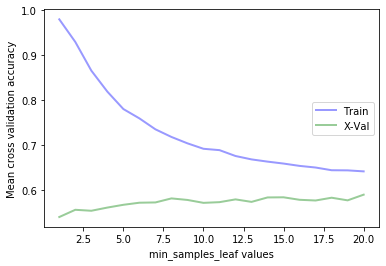

In [254]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
train_scores, test_scores = calc_params(x_train, y_train, rf, msl, 'min_samples_leaf', 5)

#### Seems that min_samples_leaf = 20 works well in this case 

max_depth = 1 Train = 0.5544714685222557 Test = 0.554320727721659
max_depth = 2 Train = 0.5843389164685522 Test = 0.5796967188404688
max_depth = 3 Train = 0.5923857573162625 Test = 0.587431393284557
max_depth = 4 Train = 0.6032181674461498 Test = 0.5861920461668764
max_depth = 5 Train = 0.6193123282093047 Test = 0.5812380072829588
max_depth = 6 Train = 0.649720733452701 Test = 0.5772151535307037
max_depth = 7 Train = 0.6872479954009497 Test = 0.5871189246869333
max_depth = 8 Train = 0.7307333029923769 Test = 0.5778338700647427
max_depth = 9 Train = 0.7760755370049883 Test = 0.5778372196515472
max_depth = 10 Train = 0.819792234312029 Test = 0.5608112699240602


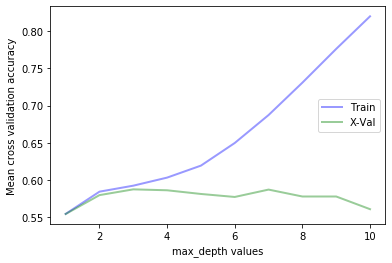

In [349]:
m_depth = [1,2,3,4,5,6,7,8,9,10]

rf = RandomForestClassifier(n_estimators=10, random_state=42)
train_scores, test_scores = calc_params(x_train, y_train, rf, m_depth, 'max_depth', 5)

#### Seems that max_depth = 3 works well in this case

In [209]:
nest = range(5, 101, 5)
print(nest)

range(5, 101, 5)


n_estimators = 5 Train = 0.9387961327257157 Test = 0.5199644943798718
n_estimators = 10 Train = 0.9798823289877898 Test = 0.5391509275962887
n_estimators = 15 Train = 0.9917208412429412 Test = 0.5543173781348543
n_estimators = 20 Train = 0.995589822205987 Test = 0.5552466492169145
n_estimators = 25 Train = 0.9976013976801145 Test = 0.567935841057321
n_estimators = 30 Train = 0.9980656442562774 Test = 0.5645269187150984
n_estimators = 35 Train = 0.9989167679695313 Test = 0.5697924691718386
n_estimators = 40 Train = 0.9995357833655707 Test = 0.5710318162895192
n_estimators = 45 Train = 0.9997678916827851 Test = 0.5701049377694622
n_estimators = 50 Train = 0.9996905222437137 Test = 0.5670103980744661
n_estimators = 55 Train = 0.9998452611218568 Test = 0.571341413812739
n_estimators = 60 Train = 0.9998452611218568 Test = 0.5673214311348879
n_estimators = 65 Train = 0.9999226305609283 Test = 0.5713428493499408
n_estimators = 70 Train = 0.9999226305609283 Test = 0.5722716419196003
n_estimato

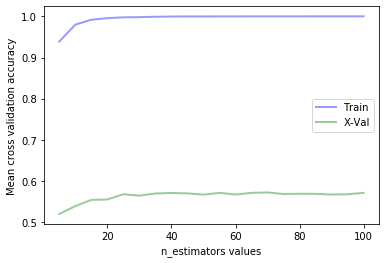

In [350]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
train_scores, test_scores = calc_params(x_train, y_train, rf, nest, 'n_estimators', 5)

#### Seems that n_estimators = 70 works well

In [363]:
# build and test our final model with these parameters

rf = RandomForestClassifier(n_estimators=70, min_samples_leaf=20, max_depth=3)
rf = rf.fit(x_train, y_train)

measure_performance(x_test, y_test, rf, show_confussion_matrix=False, show_classification_report=False)

Accuracy:0.610 

